In [18]:
import sys, math, os
# add brew ROOT (Mac) the system path from bash_profile 
# e.g. export JUPYROOT=/usr/local/Cellar/root/6.18.04/lib/root)
sys.path.append(os.environ["JUPYROOT"]) 
sys.path.append('CommonUtils/')
import RUtils as ru
import numpy as np

filePath="DATA/Run1_4DS_ana.root"
histPath="TrackSummary/FitResults/Times_gt_1800MeV"

dataX, n_binsX, dBinsX = ru.hist2np(file_path=filePath, hist_path=histPath)
print("dBinsX",dBinsX,"us bins:", n_binsX)
print("Size in memoery [MB]", dataX.nbytes*1e-6)
np.save("DATA/misc/wiggle.npy", dataX)

RUtils::hist2np Opening TrackSummary/FitResults/Times_gt_1800MeV in DATA/Run1_4DS_ana.root
RUtils::hist2np Opened Name: Times_gt_1800MeV Title:  NbinsX: 6000 <class 'float'> with 101968589 entries (exc. over/underflows)
dBinsX 0.148936 us bins: 6000
Size in memoery [MB] 815.748712


In [1]:
import sys, os
sys.path.append('CommonUtils/')
import CommonUtils as cu
import numpy as np
import matplotlib.pyplot as plt

# Load data from file
data = np.load("DATA/misc/wiggle.npy")

In [5]:
#set some constants
modN = 100 # us; fold plot every 100 us
binW = 150*1e-3 # ns; bin wdith  
xmax=np.max(data)
xmin=np.min(data)
print("modN=",modN,"binW=", binW, "ns, xmax=", xmax, "xmin=", xmin)
binN= (xmax-xmin) / (binW)
print("binN=",binN)
binN=int(binN)
print("binN=",binN)
print("Entries", len(data))

modN= 100 binW= 0.15 ns, xmax= 661.9460520000001 xmin= 2.0106360000000003
binN= 4399.569440000001
binN= 4399
Entries 101968589


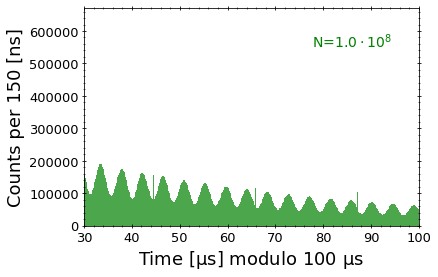

In [15]:
ax, legend = cu.plotHist(data, n_bins=binN+1)
N=cu.sci_notation(len(data)) # format as a 
cu.textL(ax, 0.8, 0.85,"N="+N, font_size=14)
ax.set_ylabel("Counts per "+str(int(binW*1e3))+" [ns]", fontsize=18)
ax.set_xlabel(r"Time [$\mathrm{\mu}$s] modulo "+str(modN)+" $\mathrm{\mu}$s", fontsize=18)
ax.set_xlim(30, 100)
plt.savefig("fig/wiggle.png")

30 100 466.6666666666667 0.15


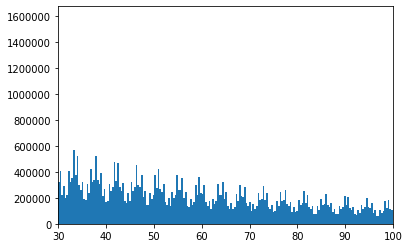

In [28]:
xmin=30
xmax=100
binN= (xmax-xmin) / (binW)

print(xmin, xmax, binN, binW)

fig, ax = plt.subplots()
ax.hist(data, bins=int(binN*4));
ax.set_xlim(xmin, xmax);